In [2]:
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

***Open with data***

In [14]:
with open('../DataBases/CD4EncodedBase.pkl', 'rb') as f:
    columns, CD4_Attributes, CD4_ClassResults = pickle.load(f)
with open('../Databases/VlEncodedBase.pkl', 'rb') as f:
    columns, VL_Attributes, VL_ClassResults = pickle.load(f)
with open('../DataBases/CD4EncodedBaseBalanced.pkl', 'rb') as f:
    columns, CD4_AttributesBalanced, CD4_ClassResultsBalanced = pickle.load(f)
with open('../Databases/VlEncodedBaseBalanced.pkl', 'rb') as f:
    columns, VL_AttributesBalanced, VL_ClassResultsBalanced = pickle.load(f)

***Generate training and test***

In [16]:
Cd4AttributesTraining, Cd4AttributesTest, Cd4ClassResultsTraining, Cd4ClassResultsTest = train_test_split(CD4_Attributes, CD4_ClassResults, test_size=0.2, random_state=0)
VlAttributesTraining, Vl4AttributesTest, VlClassResultsTraining, VlClassResultsTest = train_test_split(VL_Attributes, VL_ClassResults, test_size=0.2, random_state=0)
Cd4AttributesTrainingBalanced, Cd4AttributesTestBalanced, Cd4ClassResultsTrainingBalanced, Cd4ClassResultsTestBalanced = train_test_split(CD4_AttributesBalanced, CD4_ClassResultsBalanced, test_size=0.2, random_state=0)
VlAttributesTrainingBalanced, VlAttributesTestBalanced, VlClassResultsTrainingBalanced, VlClassResultsTestBalanced = train_test_split(VL_AttributesBalanced, VL_ClassResultsBalanced, test_size=0.2, random_state=0)

***GridSearch for Random Forest***

In [17]:
params = {
    'n_estimators': [120],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [3, 5, 10, 20, 50, 100],
    'min_samples_leaf': [3, 5, 10, 20, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', None]
}

***Creating Grid***

In [18]:
grid = GridSearchCV(
    RandomForestClassifier(),
    param_grid=params,
    cv=5,
    verbose=1,
    n_jobs=-1
)

***Run Grid***

In [50]:
grid.fit(VL_AttributesBalanced, VL_ClassResultsBalanced)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 30, None],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [3, 5, 10, 20, 50, 100],
                         'min_samples_split': [3, 5, 10, 20, 50, 100],
                         'n_estimators': [120]},
             verbose=1)

In [52]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 120}
0.7965596964390895


***Criando e executando a Random Forest***

In [56]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=30, max_features='auto', min_samples_leaf=3, min_samples_split=5, n_estimators=120)
model = rfc.fit(VlAttributesTrainingBalanced, VlClassResultsTrainingBalanced)
rfc.score(VlAttributesTestBalanced, VlClassResultsTestBalanced)

c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7864214992927864

***Analisando métricas da Random Forest criada***

c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


0.7864214992927864

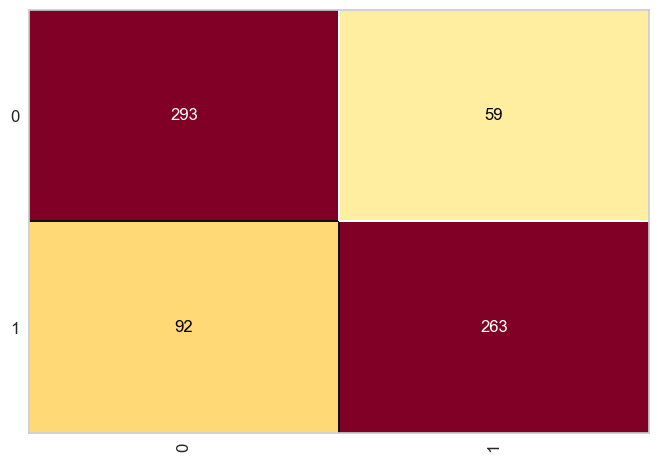

In [57]:
from sklearn.metrics import confusion_matrix

cm = ConfusionMatrix(model)
cm.score(VlAttributesTestBalanced, VlClassResultsTestBalanced)


In [58]:
y_pred = rfc.predict(VlAttributesTestBalanced)
report = classification_report(VlClassResultsTestBalanced, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       352
           1       0.82      0.74      0.78       355

    accuracy                           0.79       707
   macro avg       0.79      0.79      0.79       707
weighted avg       0.79      0.79      0.79       707

